In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

import re

import json
import csv
import random
import os
import cv2

In [2]:
with open('E:/Lab/Project/VN Legal Dataset Benchmark/Data Part 4/question_9.7.json', encoding="utf8") as f:
    data = json.load(f)

In [3]:
print(len(data))

16756


In [3]:
def classify_question_type(question):
    # Define a dictionary to map question types to their keywords
    question_type_keywords = {
        "Quantity/Time": ["bao lâu", "bao nhiêu", "khi nào", "Số ngày", "mấy lần", "mấy lần?", "Bao lâu", "Bao nhiêu", "mấy", "Mấy", "Thời hạn", "Mức đóng", "Thời điểm", "Thời gian"],
        "Person": ["Ai", " ai ", "ai?", "AI", "ai?", "là ai"],
        "Place": ["Tới đâu", "tới đâu", "ở đâu", "Ở đâu", "tại đâu", "Tại đâu", "đến đâu"],
        "Choosing": ["hay"],
        "True/False": ["không?", "Có", "có được", "có cần", "có nhất thiết", "có bắt buộc", "có bị", "Chỉ có", "có phải", "sai?", "phải", "phải có", "Phải có", "có thể", "có vi phạm", "có xin", "có thuộc", "có còn", "có đúng", "có quyền", "có ảnh hưởng", "có giá trị", "có hiệu lực", "có toàn quyền", "cần có", "hay không", "đúng không?", "hay sao"],
        "List": ["gì", "như thế nào?", "như thế nào", "ra sao", "nào", "Điều kiện", "Hướng dẫn", "Trách nhiệm", "từ đâu", "Thành phần", "Trình tự", "Thứ tự", "Nội dung", "Quy định"],
    }

    # Check for "hay không" to classify as "True/False"
    if "hay không" in question:
        return "True/False"
    
    # Check for double question marks to classify as "Double"
    if question.count('?') == 2:
        return "Double"

    for question_type, keywords in question_type_keywords.items():
        for keyword in keywords:
            # Use regular expression with word boundaries to match whole words
            pattern = r'\b{}\b'.format(re.escape(keyword))
            if re.search(pattern, question):
                return question_type
    return "List" # Default type if none matched

# CODE SUA O QUICKFIXDEFINETYPEQUES.ipynb -> Replaced! :D

In [4]:
# Create a DataFrame from the JSON data
df = pd.DataFrame(data)

# Apply the classify_question_type function to create the "question_type" column
df['question_type'] = df['question'].apply(classify_question_type)

# Insert the "question_type" column between "question" and "answer"
column_order = ['id', 'href', 'question', 'question_type', 'answer', 'short_answer', 'relevant_laws']
df = df.reindex(columns=column_order)

# Display the DataFrame
df.head()

,id,href,question,question_type,answer,short_answer,relevant_laws
0,1,https://thuvienphapluat.vn/hoi-dap-phap-luat/8...,Ngân hàng Hợp tác xã Việt Nam cho vay đặc biệt...,List,Tại khoản 3 Điều 4 Thông tư 08/2021/TT-NHNN có...,Ngân hàng Hợp tác xã Việt Nam cho vay đặc biệt...,[{'name': 'khoản 3 Điều 4 Thông tư 08/2021/TT-...
1,2,https://thuvienphapluat.vn/hoi-dap-phap-luat/8...,Tội lừa đảo chiếm đoạt tài sản sau bao lâu thì...,Quantity/Time,Căn cứ khoản 2 Điều 70 Bộ luật Hình sự 2015 về...,người bị kết án về tội lừa đảo chiếm đoạt tài ...,[{'name': 'khoản 2 Điều 70 Bộ luật Hình sự 201...
2,3,https://thuvienphapluat.vn/hoi-dap-phap-luat/8...,Công ty tài chính còn những hoạt động nào ngoà...,List,Căn cứ Điều 109 Luật Các tổ chức tín dụng 2010...,,[{'name': 'Điều 104 Luật Các tổ chức tín dụng ...
3,4,https://thuvienphapluat.vn/hoi-dap-phap-luat/8...,Thời gian hỗ trợ lãi suất vay ngân hàng được t...,Quantity/Time,Tại khoản 1 Điều 5 Nghị định 31/2022/NĐ-CP quy...,thời gian hỗ trợ lãi suất vay ngân hàng được t...,[{'name': 'khoản 1 Điều 5 Nghị định 31/2022/NĐ...
4,5,https://thuvienphapluat.vn/hoi-dap-phap-luat/8...,Lãi suất tiền gửi tiết kiệm tại ngân hàng thươ...,List,Căn cứ tại khoản 1 Điều 5 Thông tư 48/2018/TT-...,tiền gửi tiết kiệm là khoản tiền được người gử...,[{'name': 'khoản 1 Điều 5 Thông tư 48/2018/TT-...


In [7]:
# # Count the number of questions labeled as "Unknown" in the DataFrame
# unknown_question_count = df[df["question_type"] == "Unknown"].shape[0]

# # Create a list of IDs of questions labeled as "Unknown"
# unknown_question_ids = df[df["question_type"] == "Unknown"].index.tolist()

# # Display the number of questions labeled as "Unknown" and their IDs
# print("Number of questions labeled as 'Unknown':", unknown_question_count)
# print("IDs of questions labeled as 'Unknown':", unknown_question_ids)

In [8]:
# for i in unknown_question_ids:
#     print(df["question"][i])
#     print(df["short_answer"][i])
#     print()

In [15]:
data_length = len(df)

# Choose 10 random indices
random_indices = random.sample(range(data_length), 100)

# Print the 'new_answer' and 'article_related' values for the selected samples
for index in random_indices:
    print(df['id'][index])
    print("question:", df['question'][index])
    print()
    print("ans:", df['answer'][index])
    print()
    print("type:", df['question_type'][index])
    print("-----------------------------------")

14516
question: Thẩm quyền thành lập trường trung học phổ thông chuyên công lập được quy định như thế nào?

ans: Thẩm quyền thành lập trường trung học phổ thông chuyên công lập được quy định tại Điều 56 Nghị định 46/2017/NĐ-CP quy định về điều kiện đầu tư và hoạt động trong lĩnh vực giáo dục như sau: a) Chủ tịch Ủy ban nhân dân cấp tỉnh quyết định thành lập trường chuyên công lập thuộc tỉnh hoặc cho phép thành lập trường chuyên tư thục thuộc tỉnh theo đề nghị của Giám đốc Sở Giáo dục và Đào tạo; b) Chủ tịch Ủy ban nhân dân cấp tỉnh nơi trường đặt trụ sở quyết định thành lập trường chuyên công lập hoặc cho phép thành lập trường chuyên tư thục thuộc cơ sở giáo dục đại học theo đề nghị của Thủ trưởng cơ sở giáo dục đại học. Trên đây là tư vấn của Ban biên tập Thư Ký Luật về thẩm quyền thành lập trường trung học phổ thông chuyên công lập. Bạn nên tham khảo chi tiết Nghị định 46/2017/NĐ-CP để nắm rõ quy định này.

type: List
-----------------------------------
856
question: Một người để lại

In [12]:
# Convert the DataFrame back to the original JSON format
json_data = df.to_dict(orient='records')

# Export the JSON data to a file
with open('question_9.7_addtype2.json', 'w', encoding='utf-8') as json_file:
    json.dump(json_data, json_file, ensure_ascii=False, indent=4)

In [5]:
# Convert the DataFrame back to the original JSON format
json_data = df.to_dict(orient='records')

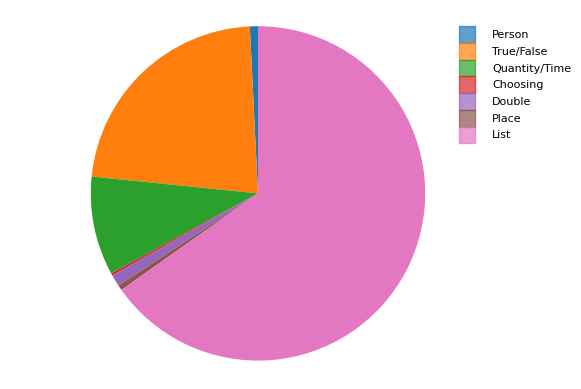

Person: 130
True/False: 3789
Quantity/Time: 1600
Choosing: 39
Double: 190
Place: 83
List: 10925


In [17]:
# Extract question types
question_types = [entry["question_type"] for entry in json_data]

# Count occurrences of each question type
question_type_counts = {question_type: question_types.count(question_type) for question_type in set(question_types)}

# Plotting
fig, ax = plt.subplots()
wedges, _ = ax.pie(
    question_type_counts.values(),
    labels=None,
    autopct=None,
    startangle=90,
)

# Customizing the plot
ax.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Adding labels to the wedges
question_type_labels = list(question_type_counts.keys())
for i, (wedge, question_type) in enumerate(zip(wedges, question_type_labels)):
    # Adding a legend-like box for each question type
    rect = plt.Rectangle((1.2, 0.9 - i * 0.1), 0.1, 0.1, color=wedge.get_facecolor(), alpha=0.7)
    ax.add_patch(rect)
    ax.text(1.4, 0.95 - i * 0.1, question_type, va='center', ha='left', fontsize=8, color='black')

# Show the plot
plt.show()

# Print the number of each question type
for question_type, count in question_type_counts.items():
    print(f"{question_type}: {count}")

In [10]:
# !pip install nltk wordcloud

     -------------------------------------- 153.3/153.3 kB 1.8 MB/s eta 0:00:00


In [11]:
import nltk
from wordcloud import WordCloud
# Download NLTK resources (you only need to do this once)
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Legion
[nltk_data]     7\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

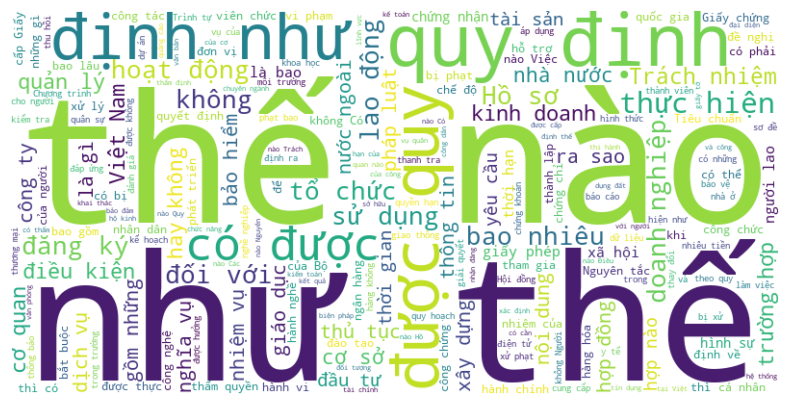

In [12]:
# Extract the question text
questions = [entry["question"] for entry in json_data]

# Combine all questions into a single text
text = " ".join(questions)

# Tokenize the text into words
words = nltk.word_tokenize(text)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(words))

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()